## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  70.411363   769.665970  0.674824   1.366979  1.535862
1  75.056304  1334.512367  0.273578  10.753214  1.347217
2  66.696239  1314.209996  0.257737   7.268932  1.369269
3  16.759277   342.015445  0.364809   5.853147  1.495724
4   3.206230  1614.459832  0.772460   6.993935  1.653159


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0368793	total: 57.3ms	remaining: 57.2s
1:	learn: 1.0279035	total: 57.8ms	remaining: 28.9s
2:	learn: 1.0178181	total: 58.3ms	remaining: 19.4s
3:	learn: 1.0073697	total: 59ms	remaining: 14.7s
4:	learn: 0.9981099	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9890065	total: 59.9ms	remaining: 9.93s
6:	learn: 0.9812022	total: 60.4ms	remaining: 8.57s
7:	learn: 0.9717144	total: 60.9ms	remaining: 7.55s
8:	learn: 0.9599731	total: 61.2ms	remaining: 6.74s
9:	learn: 0.9497598	total: 61.6ms	remaining: 6.09s
10:	learn: 0.9423890	total: 62.1ms	remaining: 5.58s
11:	learn: 0.9340701	total: 62.6ms	remaining: 5.15s
12:	learn: 0.9254707	total: 62.9ms	remaining: 4.77s
13:	learn: 0.9180781	total: 63.3ms	remaining: 4.46s
14:	learn: 0.9090459	total: 63.8ms	remaining: 4.19s
15:	learn: 0.8998923	total: 64.2ms	remaining: 3.95s
16:	learn: 0.8909626	total: 64.7ms	remaining: 3.74s
17:	learn: 0.8835585	total: 65.1ms	remaining: 3.55s
18:	learn: 0.8767403	total: 65.5ms	remaining: 

84:	learn: 0.5073169	total: 93.7ms	remaining: 1.01s
85:	learn: 0.5045809	total: 94.2ms	remaining: 1s
86:	learn: 0.5016238	total: 94.7ms	remaining: 994ms
87:	learn: 0.4988216	total: 95ms	remaining: 985ms
88:	learn: 0.4954094	total: 95.4ms	remaining: 976ms
89:	learn: 0.4913624	total: 96ms	remaining: 970ms
90:	learn: 0.4875027	total: 96.3ms	remaining: 961ms
91:	learn: 0.4842899	total: 96.6ms	remaining: 953ms
92:	learn: 0.4811426	total: 96.9ms	remaining: 945ms
93:	learn: 0.4778481	total: 97.3ms	remaining: 938ms
94:	learn: 0.4750417	total: 97.9ms	remaining: 932ms
95:	learn: 0.4712409	total: 98.3ms	remaining: 925ms
96:	learn: 0.4689017	total: 98.7ms	remaining: 919ms
97:	learn: 0.4661545	total: 99ms	remaining: 911ms
98:	learn: 0.4629605	total: 99.3ms	remaining: 904ms
99:	learn: 0.4595775	total: 99.8ms	remaining: 898ms
100:	learn: 0.4574416	total: 100ms	remaining: 891ms
101:	learn: 0.4550595	total: 101ms	remaining: 886ms
102:	learn: 0.4520083	total: 101ms	remaining: 880ms
103:	learn: 0.4480030

297:	learn: 0.1930596	total: 185ms	remaining: 436ms
298:	learn: 0.1924283	total: 186ms	remaining: 435ms
299:	learn: 0.1918393	total: 186ms	remaining: 434ms
300:	learn: 0.1911351	total: 186ms	remaining: 433ms
301:	learn: 0.1906161	total: 187ms	remaining: 432ms
302:	learn: 0.1899818	total: 187ms	remaining: 430ms
303:	learn: 0.1893663	total: 188ms	remaining: 429ms
304:	learn: 0.1886619	total: 188ms	remaining: 428ms
305:	learn: 0.1880996	total: 188ms	remaining: 427ms
306:	learn: 0.1876590	total: 189ms	remaining: 426ms
307:	learn: 0.1870393	total: 189ms	remaining: 425ms
308:	learn: 0.1866163	total: 190ms	remaining: 424ms
309:	learn: 0.1860823	total: 190ms	remaining: 423ms
310:	learn: 0.1855454	total: 190ms	remaining: 422ms
311:	learn: 0.1849797	total: 191ms	remaining: 421ms
312:	learn: 0.1845608	total: 192ms	remaining: 421ms
313:	learn: 0.1840536	total: 192ms	remaining: 420ms
314:	learn: 0.1835565	total: 192ms	remaining: 418ms
315:	learn: 0.1829856	total: 193ms	remaining: 418ms
316:	learn: 

517:	learn: 0.0990185	total: 275ms	remaining: 256ms
518:	learn: 0.0989130	total: 276ms	remaining: 256ms
519:	learn: 0.0984812	total: 276ms	remaining: 255ms
520:	learn: 0.0982867	total: 277ms	remaining: 255ms
521:	learn: 0.0981093	total: 277ms	remaining: 254ms
522:	learn: 0.0979363	total: 278ms	remaining: 253ms
523:	learn: 0.0977673	total: 278ms	remaining: 253ms
524:	learn: 0.0972421	total: 279ms	remaining: 252ms
525:	learn: 0.0970774	total: 279ms	remaining: 251ms
526:	learn: 0.0969165	total: 280ms	remaining: 251ms
527:	learn: 0.0967595	total: 280ms	remaining: 250ms
528:	learn: 0.0962362	total: 281ms	remaining: 250ms
529:	learn: 0.0960830	total: 281ms	remaining: 249ms
530:	learn: 0.0959872	total: 281ms	remaining: 249ms
531:	learn: 0.0958382	total: 282ms	remaining: 248ms
532:	learn: 0.0953256	total: 282ms	remaining: 247ms
533:	learn: 0.0951802	total: 282ms	remaining: 246ms
534:	learn: 0.0950382	total: 283ms	remaining: 246ms
535:	learn: 0.0949472	total: 283ms	remaining: 245ms
536:	learn: 

720:	learn: 0.0580972	total: 367ms	remaining: 142ms
721:	learn: 0.0580527	total: 368ms	remaining: 142ms
722:	learn: 0.0578475	total: 368ms	remaining: 141ms
723:	learn: 0.0575891	total: 369ms	remaining: 140ms
724:	learn: 0.0575451	total: 369ms	remaining: 140ms
725:	learn: 0.0573286	total: 369ms	remaining: 139ms
726:	learn: 0.0572851	total: 370ms	remaining: 139ms
727:	learn: 0.0571284	total: 370ms	remaining: 138ms
728:	learn: 0.0570854	total: 370ms	remaining: 138ms
729:	learn: 0.0569134	total: 371ms	remaining: 137ms
730:	learn: 0.0568163	total: 371ms	remaining: 137ms
731:	learn: 0.0566168	total: 372ms	remaining: 136ms
732:	learn: 0.0564392	total: 372ms	remaining: 136ms
733:	learn: 0.0563964	total: 373ms	remaining: 135ms
734:	learn: 0.0563015	total: 373ms	remaining: 135ms
735:	learn: 0.0561506	total: 374ms	remaining: 134ms
736:	learn: 0.0561083	total: 374ms	remaining: 133ms
737:	learn: 0.0560666	total: 374ms	remaining: 133ms
738:	learn: 0.0559741	total: 375ms	remaining: 132ms
739:	learn: 

943:	learn: 0.0341757	total: 458ms	remaining: 27.1ms
944:	learn: 0.0341446	total: 458ms	remaining: 26.7ms
945:	learn: 0.0340648	total: 459ms	remaining: 26.2ms
946:	learn: 0.0340341	total: 459ms	remaining: 25.7ms
947:	learn: 0.0339334	total: 459ms	remaining: 25.2ms
948:	learn: 0.0338552	total: 460ms	remaining: 24.7ms
949:	learn: 0.0337823	total: 460ms	remaining: 24.2ms
950:	learn: 0.0337522	total: 461ms	remaining: 23.7ms
951:	learn: 0.0337136	total: 461ms	remaining: 23.3ms
952:	learn: 0.0335684	total: 462ms	remaining: 22.8ms
953:	learn: 0.0335391	total: 462ms	remaining: 22.3ms
954:	learn: 0.0334407	total: 462ms	remaining: 21.8ms
955:	learn: 0.0333442	total: 463ms	remaining: 21.3ms
956:	learn: 0.0332677	total: 463ms	remaining: 20.8ms
957:	learn: 0.0332300	total: 464ms	remaining: 20.3ms
958:	learn: 0.0331528	total: 464ms	remaining: 19.9ms
959:	learn: 0.0330780	total: 465ms	remaining: 19.4ms
960:	learn: 0.0330086	total: 465ms	remaining: 18.9ms
961:	learn: 0.0329819	total: 466ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

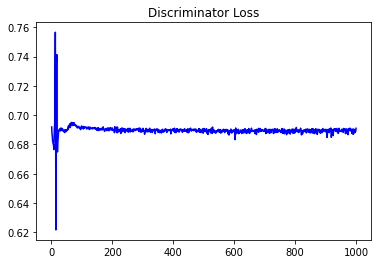

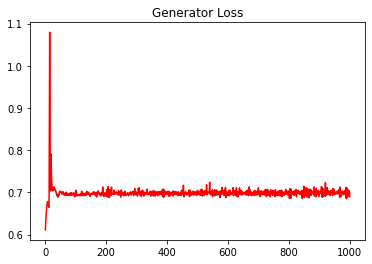

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3111957116365194


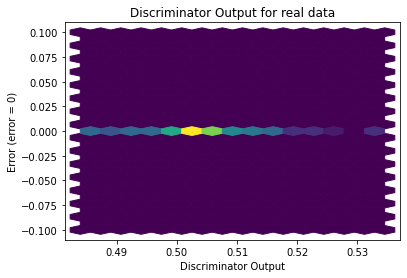

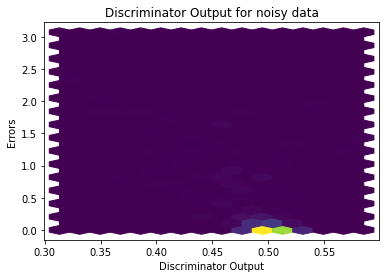

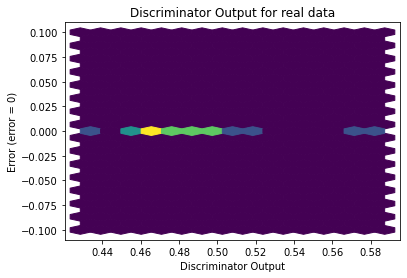

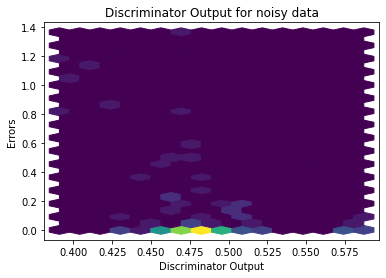

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


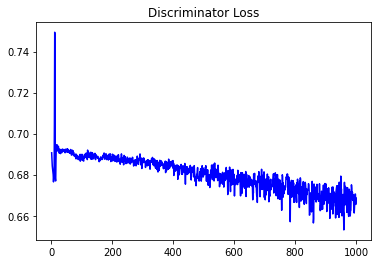

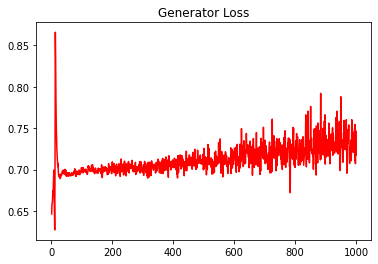

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.37474899456005767


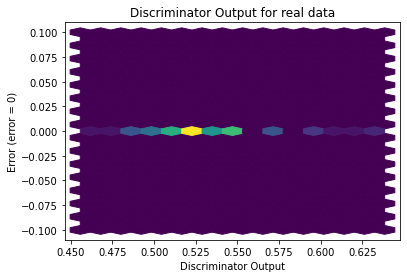

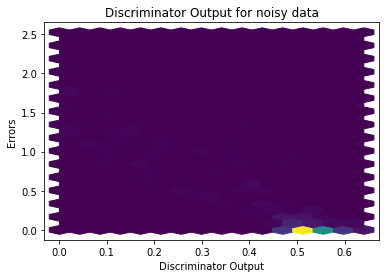

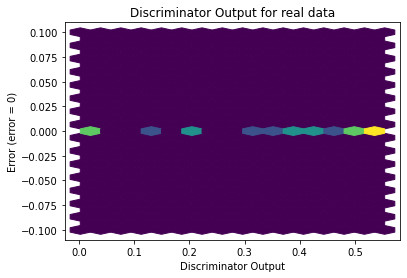

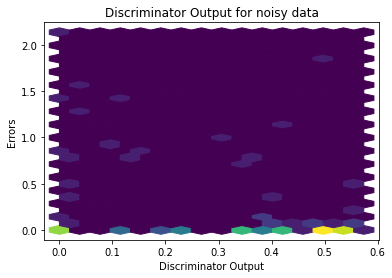

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3264]], requires_grad=True)
